<a href="https://colab.research.google.com/github/M1mirr/food-sales-predictions/blob/main/final_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Coding Dojo: Data Science/Data/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Check for missing values
print(df.isna().sum())
print('\n========================')
print(f'There are',df.isna().sum().sum(), 'missing values')

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 3873 missing values


In [ ]:
df['Item_Weight'].fillna(method='pad', inplace=True)

In [ ]:
df['Outlet_Size'].isna().value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size'].fillna(method='ffill', inplace=True)

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat')

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg','Regular')


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.849649,0.066132,140.992782,1997.831867,2181.288914
std,4.631020,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.750000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


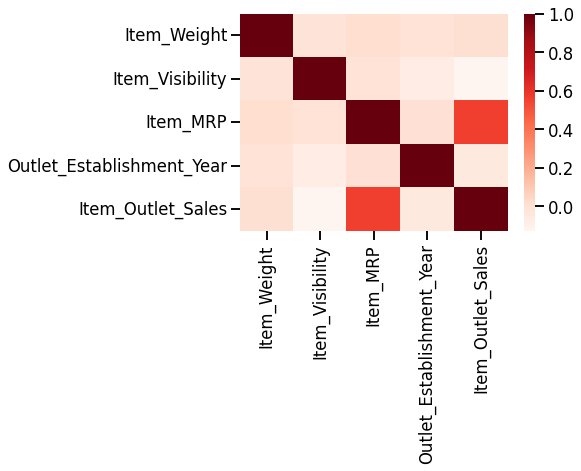

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap='Reds');

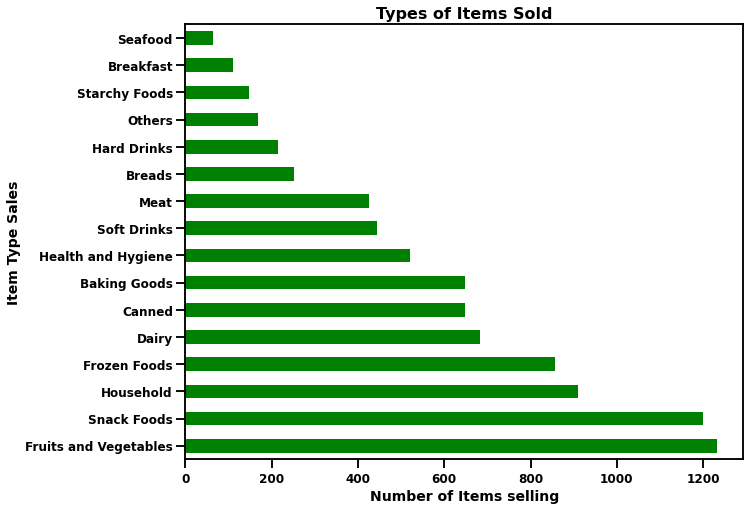

In [ ]:
plt.figure(figsize=(10,8))
df['Item_Type'].value_counts().plot(kind = 'barh', color ="green")
plt.title('Types of Items Sold',fontsize = 16, weight ="bold")
plt.xticks( fontsize = 12, weight = "bold", color="k")
plt.yticks(fontsize = 12, weight ="bold", color="k")
plt.ylabel("Item Type Sales", weight = "bold", fontsize ="14", color="k")
plt.xlabel("Number of Items selling", weight="bold", fontsize="14", color="k")
plt.show()

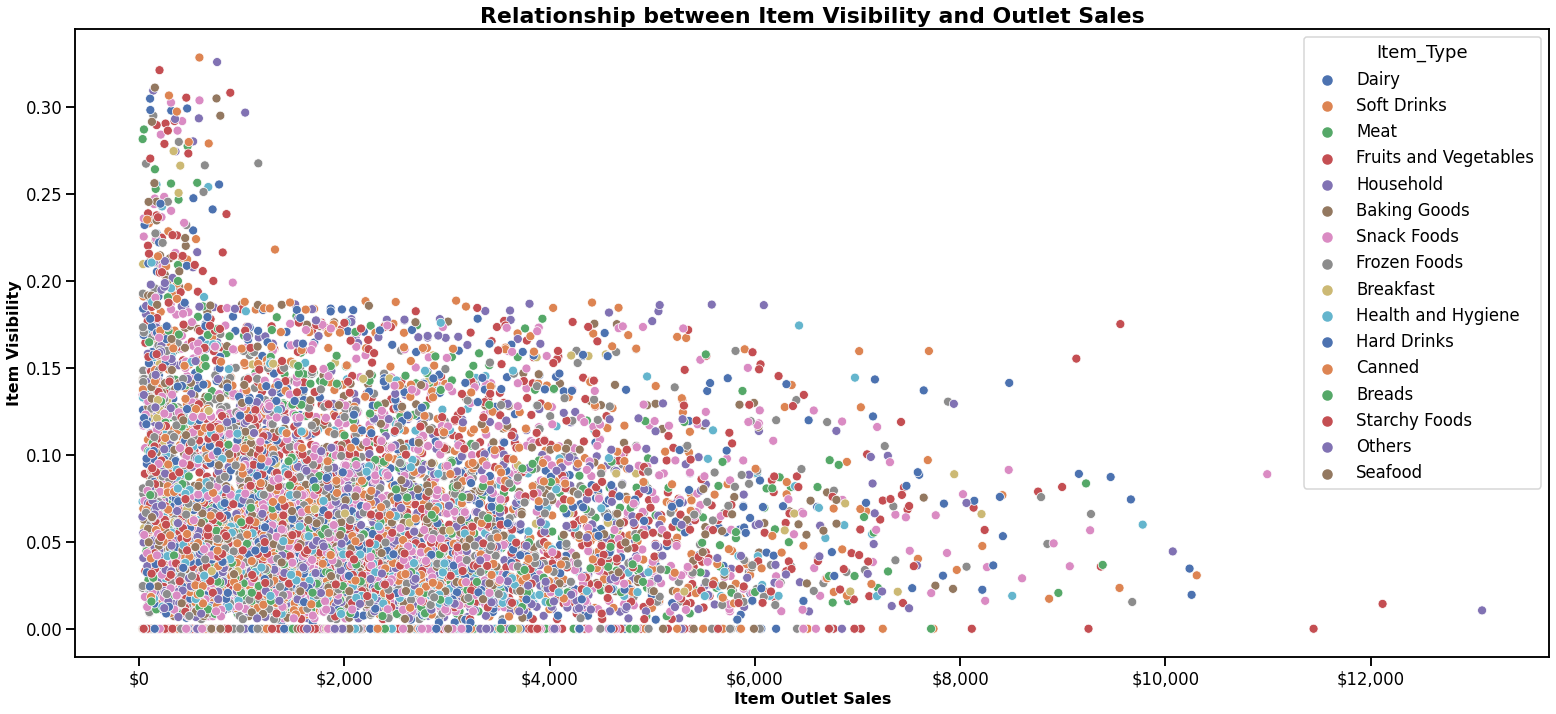

In [ ]:
fig, ax = plt.subplots(figsize=(22,10))
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(price_fmt)
sns.set_context("talk")
sns.scatterplot(data=df, x='Item_Outlet_Sales', y='Item_Visibility' ,hue='Item_Type', palette='deep', sizes=(20, 200))
plt.tight_layout()
plt.title('Relationship between Item Visibility and Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item Outlet Sales', fontsize = 16, weight='bold')
plt.ylabel('Item Visibility', fontsize = 16, weight='bold');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


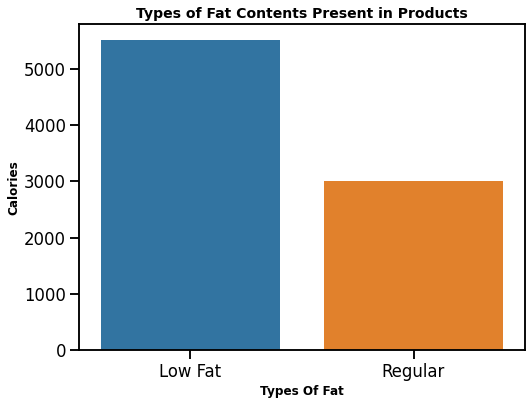

In [ ]:
plt.figure(figsize = (8,6));
sns.countplot(df['Item_Fat_Content'])
plt.title("Types of Fat Contents Present in Products", fontsize=14, weight ="bold")
plt.xlabel('Types Of Fat', fontsize=12, weight="bold")
plt.ylabel("Calories",  fontsize=12, weight="bold");

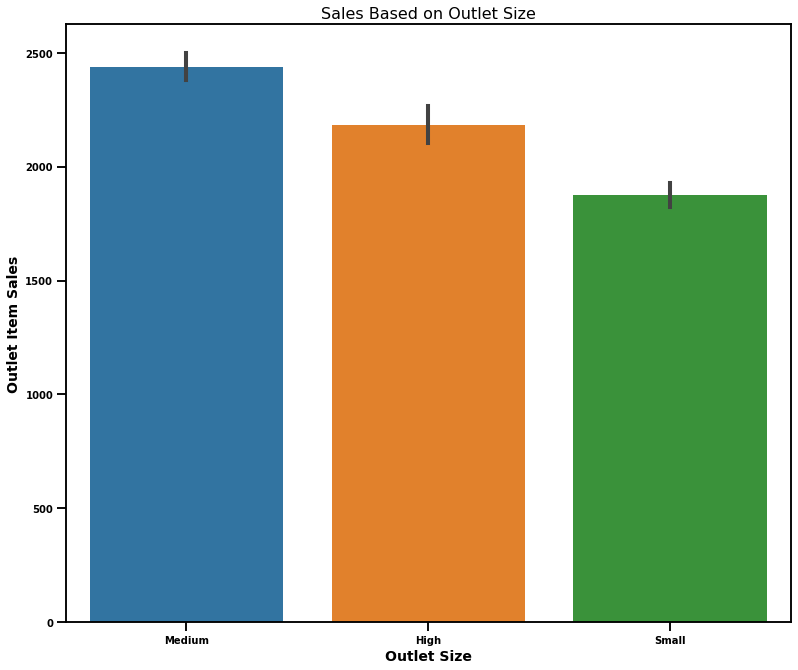

In [ ]:
plt.figure(figsize=(13,11))
sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', linewidth=2.5)
plt.title("Sales Based on Outlet Size", fontsize=16)
plt.xlabel("Outlet Size", fontsize=14, weight ='bold')
plt.ylabel("Outlet Item Sales", fontsize=14, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.show();

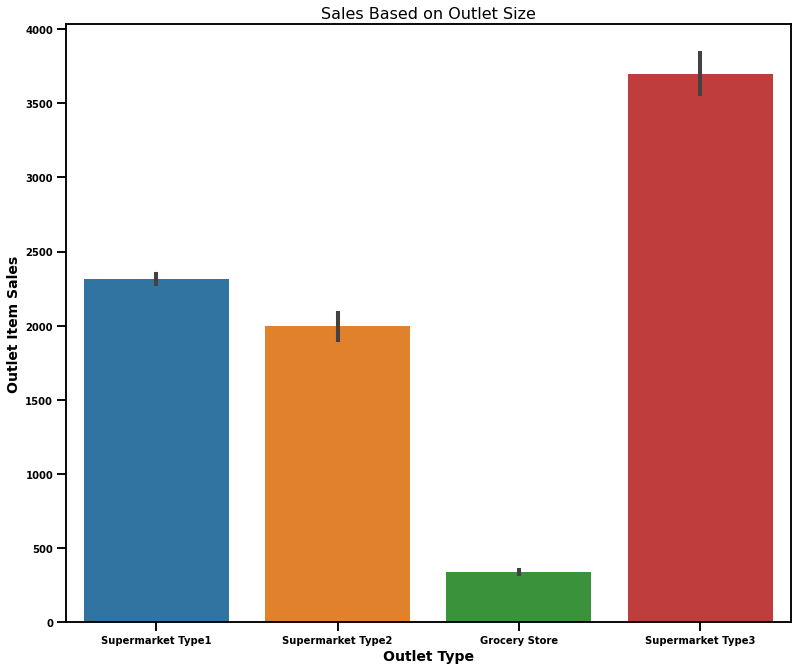

In [ ]:
plt.figure(figsize=(13,11))
sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', linewidth=2.5)
plt.title("Sales Based on Outlet Type", fontsize=16)
plt.xlabel("Outlet Type", fontsize=14, weight ='bold')
plt.ylabel("Outlet Item Sales", fontsize=14, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.show();

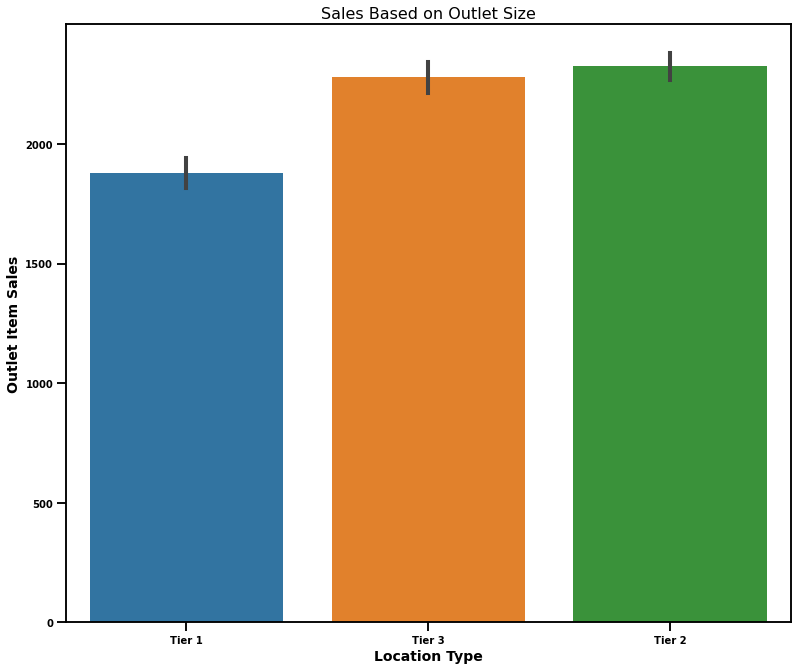

In [ ]:
plt.figure(figsize=(13,11))
sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', linewidth=2.5)
plt.title("Sales Based on Location Type", fontsize=16)
plt.xlabel("Location Type", fontsize=14, weight ='bold')
plt.ylabel("Outlet Item Sales", fontsize=14, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.show();

In [ ]:
fat_content = {'Low Fat':0, 'Regular':1}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content)

outlet_size = {'Small':0, 'Medium':1, 'High':2}
df['Outlet_Size'] = df['Outlet_Size'].replace(outlet_size)

outlet_location_type = {'Tier 1':0, 'Tier 2':1, 'Tier 3':2}
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].replace(outlet_location_type)

outlet_type = {'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3}
df['Outlet_Type'] = df['Outlet_Type'].replace(outlet_type)

In [ ]:
df.duplicated().any()

False

In [ ]:
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f' MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f} ')

In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
num_pipeline = make_pipeline(mean_imputer, scaler)

In [ ]:
cat_pipeline = make_pipeline(freq_imputer, ohe)

In [ ]:
num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)

In [ ]:
transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [ ]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8c6d66050>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8c6d66750>)])

In [ ]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8c6d66050>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8c6d66750>)])

In [ ]:
X_train_processed = transformer.transform(X_train)
X_test_processed = transformer.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train_processed)
X_test = pd.DataFrame(X_test_processed)

In [ ]:
dummy = DummyRegressor(strategy='mean')
# dummy_pipe = make_pipeline(transformer, dummy)
dummy.fit(X_train, y_train)

DummyRegressor()

In [ ]:
dummy_train_pred = dummy.predict(X_train)
dummy_test_pred = dummy.predict(X_test)

In [ ]:
print("Training Dummy Scores")
eval_model(y_train, dummy_train_pred)
print('\n')
print("Test Dummy Scores")
eval_model(y_test, dummy_test_pred)

Training Dummy Scores
 MAE: 1,360.22 
 MSE: 2,959,455.70 
 RMSE: 1,720.31 
 R2: 0.00 


Test Dummy Scores
 MAE: 1,326.12 
 MSE: 2,772,144.46 
 RMSE: 1,664.98 
 R2: -0.00 


In [ ]:
lin_reg = make_pipeline(transformer, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8c6d66050>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8c6d66750>)])),
                ('linearregression', LinearRegression())])

In [ ]:
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

In [ ]:
print("Training Line Regression")
eval_model(y_train, train_pred)
print('\n')
print("Test Line Regression")
eval_model(y_test, test_pred)

Training Line Regression
 MAE: 746.19 
 MSE: 995,905.22 
 RMSE: 997.95 
 R2: 0.66 


Test Line Regression
 MAE: 183,725,385,104,262.50 
 MSE: 5,805,917,242,972,265,734,958,806,466,560.00 
 RMSE: 2,409,547,103,289,800.00 
 R2: -2,104,372,974,954,020,759,142,400.00 


In [ ]:
max_depth_range = list(range(1,10))
r2_train_score = []
r2_test_score = []
for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train, y_train)
  train_score = dec_tree.score(X_train, y_train)
  test_score = dec_tree.score(X_test, y_test)
  r2_train_score.append(train_score)
  r2_test_score.append(test_score)
  r2_dec_tree = pd.DataFrame({'Train': r2_train_score, 'Test': r2_test_score})

In [ ]:
r2_dec_tree

,Train,Test
0,0.237797,0.229683
1,0.431641,0.433778
2,0.524218,0.524222
3,0.582705,0.583937
4,0.604247,0.596040
5,0.616099,0.584540
6,0.629980,0.575798
7,0.642672,0.553494
8,0.655865,0.544171


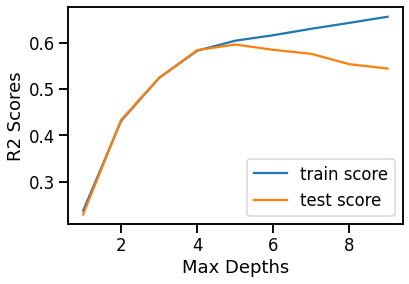

In [ ]:
plt.plot(max_depth_range, r2_dec_tree['Train'], label='train score')
plt.plot(max_depth_range, r2_dec_tree['Test'], label='test score')
plt.xlabel("Max Depths")
plt.ylabel("R2 Scores")
plt.legend()
plt.show()

In [ ]:
bagreg = BaggingRegressor(random_state=42)
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [ ]:
bagreg_train_preds = bagreg.predict(X_train)
bagreg_test_preds = bagreg.predict(X_test)

In [ ]:
print('Train Set Bagged Trees')
train_evaluation = eval_model(y_train, bagreg_train_preds)
print('\n')
print('Test Set Bagged Trees')
test_evaluation = eval_model(y_test, bagreg_test_preds)

Train Set Bagged Trees
 MAE: 315.69 
 MSE: 236,944.89 
 RMSE: 486.77 
 R2: 0.92 


Test Set Bagged Trees
 MAE: 787.52 
 MSE: 1,283,355.78 
 RMSE: 1,132.85 
 R2: 0.53 


In [ ]:
max_depth_range = list(range(1,6))
rf_train = []
rf_test = []
for depth in max_depth_range:
  rf_tree = RandomForestRegressor(max_depth=depth, random_state=42)
  rf_tree.fit(X_train, y_train)
  train_score = rf_tree.score(X_train, y_train)
  test_score = rf_tree.score(X_test, y_test)
  rf_train.append(train_score)
  rf_test.append(test_score)
  r2_rf_tree = pd.DataFrame({"Train": rf_train, 'Test': rf_test})

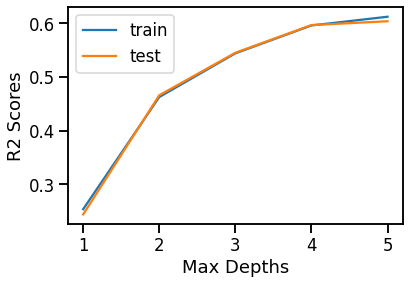

In [ ]:
plt.plot(max_depth_range, r2_rf_tree['Train'], label ='train')
plt.plot(max_depth_range, r2_rf_tree['Test'], label='test')
plt.xlabel("Max Depths")
plt.ylabel("R2 Scores")
plt.legend()
plt.show()